In [1]:
import sys
import numpy             as     np
import pylab             as     pl
import astropy.io.fits   as     fits
import matplotlib        as     mpl
import matplotlib.pyplot as     plt

from   astropy.table     import Table, join, unique
from   matplotlib.pyplot import figure

In [2]:
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/')
sys.path.append('/global/homes/m/mjwilson/desi/BGS/lumfn/py/')

In [3]:
from   MXXL.define_sample import define_sample
from   params             import params
from   vmax               import zmax
from   ajs_kcorr          import ajs_kcorr
from   distances          import comoving_volume
from   MXXL.mxxl_params   import mxxl_params

In [4]:
version = 0.2

In [5]:
bright_merge_obs = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_v{:.1f}.fits'.format(version))
bright_merge_obs

RA,DEC,Z,RMAG_DRED,MRH,REFGMR0P1,TARGETID
float64,float64,float64,float64,float64,float64,int64
3.7721402325126423,4.986124929665064,0.33743800813349156,18.87912014731125,-21.60017018500573,0.5029794807690177,0
7.291777572226474,5.216303136427634,0.3358367990279134,19.164485916386255,-21.501643485972103,0.8556049162235593,1
7.271421307032053,5.216813907554459,0.33204277967971185,18.6560738852402,-21.86481444281342,0.6210244102305459,2
7.294683707223873,5.194670649537063,0.3352653718478176,18.923197975657814,-21.416994113457505,0.3562284861943139,3
7.285466104202744,5.2123990016212325,0.3354775369684668,18.197760241964705,-22.500363698331853,0.9118769578721373,4
7.278751592950828,5.213135659398867,0.3395093738207222,19.456602708279306,-21.076593269699252,0.6392363346086005,5
7.385632448576024,5.219834477698842,0.3348199547546389,18.848583906783773,-21.87497619154432,0.9558292991507985,6
7.379988039301598,5.228525331786011,0.3361835673008482,19.387139224724134,-21.37391087548854,1.1065703757197651,7
3.722997589545035,5.043528437008822,0.33876649152353333,18.87975957082224,-21.892940844505468,0.97098179347477,8


In [6]:
derived = Table.read('/global/cscratch1/sd/mjwilson/desi/BGS/lumfn/MXXL/bright_derived_v{:.1f}.fits'.format(version))
derived

INSAMPLE,DISTMOD_ZMAX,VOLUME,MRH,RKCORR_ZMAX,GMR_DRED,ZMAX,IVMAX,TARGETID
float64,float64,float64,float64,float64,float64,float64,float64,int64
1.0,41.055125106218235,8512527.859442476,-21.594433657615397,0.03930855139716086,0.9804662982507717,0.4178996799824834,6.534919358634163e-08,0
1.0,40.7592810954082,8401008.497279251,-21.525309010057327,0.26602791464912784,1.4682376928572174,0.3727779974127923,8.925058222907302e-08,1
1.0,41.17116585260635,8140318.044465926,-21.85455632047405,0.18339046786769314,1.1074773382128371,0.43692361033919924,5.794024308823048e-08,2
1.0,41.02895623668843,8361426.049986088,-21.43272392813322,-0.09623230855520774,0.8102705479656003,0.4137158150326175,6.715701594084879e-08,3
1.0,41.403199402613,8376109.378948721,-22.52122054272638,0.6180211401178353,1.5550632526447934,0.4773699361403203,4.5701127027884905e-08,4
1.0,40.5574974440486,8658116.612267835,-21.12981593394758,0.07231848989898396,1.147812262099322,0.3446052831908925,1.1083189580047984e-07,5
1.0,40.972778588811416,8330650.856791828,-21.88400062188045,0.41122203306904564,1.6116385422853683,0.40486342162166516,7.122196395146757e-08,6
1.0,40.581617627656954,8425084.238880066,-21.395906880514506,0.31428925285756015,1.7749858611959488,0.34786748519460664,1.0798161090406571e-07,7
1.0,40.976198304106155,8605730.072279539,-21.89567897844807,0.4194806743419209,1.6356494396428993,0.405397298284511,7.096711398231258e-08,8


In [7]:
bright_merge_obs = bright_merge_obs[:len(derived)]

In [8]:
isin = derived['INSAMPLE'].astype(bool)

derived = derived[isin]

In [9]:
len(derived), len(bright_merge_obs)

(7201, 7201)

In [10]:
joined = join(derived, unique(bright_merge_obs['TARGETID', 'RMAG_DRED', 'Z', 'RA', 'DEC'], keys='TARGETID', keep='first'), join_type='left', keys='TARGETID')

In [11]:
# Ms, zs
zlimits = np.loadtxt('/global/homes/m/mjwilson/desi/BGS/lumfn/py/lumfn/data/kmax.txt')

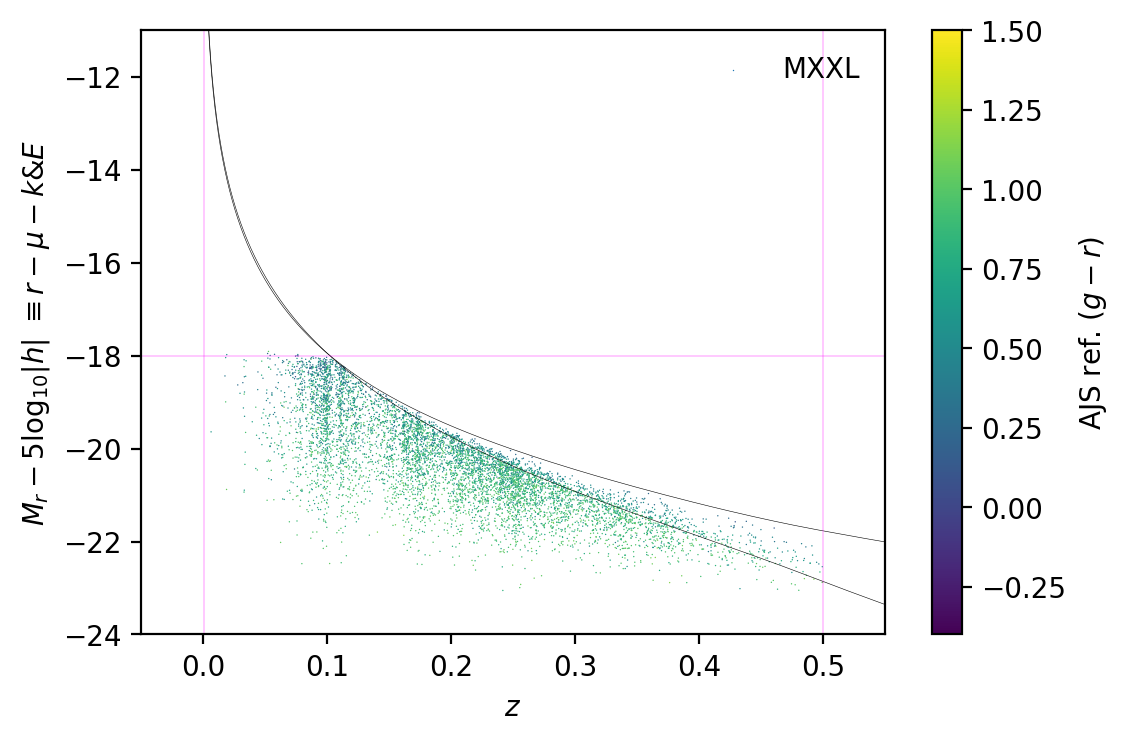

In [12]:
figure(figsize=(6, 4), dpi=200)

# red  = (bright_merge_obs['REFGMR0P1'].data >= params['rf_gmr_redblue'])
# blue = (bright_merge_obs['REFGMR0P1'].data  < params['rf_gmr_redblue'])

# pl.scatter(bright_merge_obs['Z'][red],   derived['MRH'][red],  marker='.', lw=0.0,  c='r', label='BGS OP', s=1)
# pl.scatter(bright_merge_obs['Z'][blue],  derived['MRH'][blue], marker='.', lw=0.0,  c='b', label='BGS OP', s=1)

# pl.plot(derived['ZMAX'], derived['MRH'], marker=',', lw=0.0,  c='magenta', label='zmax loci', alpha=0.2) 

pl.scatter(bright_merge_obs['Z'],  derived['MRH'], c=bright_merge_obs['REFGMR0P1'], marker='.', lw=0.0, label='MXXL', s=1, vmin=-0.4, vmax=1.5)
# pl.scatter(derived['ZMAX'],  derived['MRH'], marker='.', lw=0.0,  c='magenta', label='ZMAX', s=1, alpha=0.2)

pl.plot(zlimits[:,2], zlimits[:,0], c='k', lw=0.2)
pl.plot(zlimits[:,2], zlimits[:,1], c='k', lw=0.2)

pl.xlabel('$z$')
pl.ylabel('$M_r - 5\log_{10}|h|$ $\equiv r - \mu -k&E$ ')

pl.xlim(-0.05, 0.55)
pl.ylim( -24., -11.)

pl.legend(frameon=False, loc=1)
pl.colorbar(label='AJS ref. $(g-r)$')

pl.axvline(0.001, c='magenta', lw=0.15)
pl.axvline(0.500, c='magenta', lw=0.15)

pl.axhline(-18.0, c='magenta', lw=0.15)

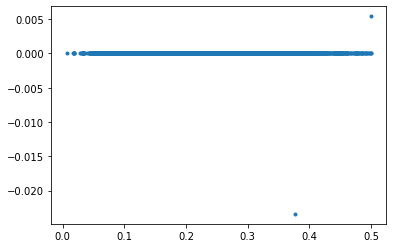

In [13]:
pl.plot(joined['Z'], joined['MRH'] + joined['DISTMOD_ZMAX'] + joined['RKCORR_ZMAX'] - 19.5, marker='.', lw=0.0) 

Text(0, 0.5, '$N(z)$')

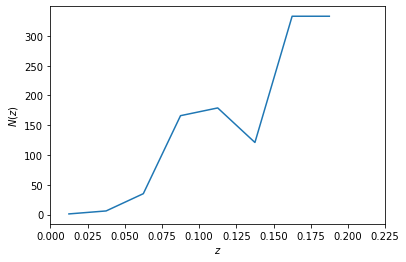

In [14]:
sample     = joined[(joined['MRH']> -22.) & (joined['MRH'] < -20.)]

dz         = 0.025
bins       = np.arange(0.0, 0.2+dz, dz)
cnts, _    = np.histogram(sample['Z'], bins=bins)

pl.plot(bins[:-1] + dz/2., cnts)
pl.xlim(0.0, 0.2+dz)

pl.xlabel('$z$')
pl.ylabel('$N(z)$')

(0.0, 0.225)

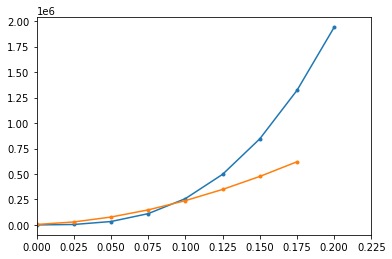

In [15]:
Vs  = comoving_volume(min_z=bins[0], max_z=bins, fsky=mxxl_params['fsky'])
dVs = np.roll(Vs, shift=-1) - Vs

pl.plot(bins,       Vs,      marker='.')
pl.plot(bins[:-1], dVs[:-1], marker='.')

pl.xlim(0.0, 0.2 + dz)

Text(0, 0.5, '$N(z)$')

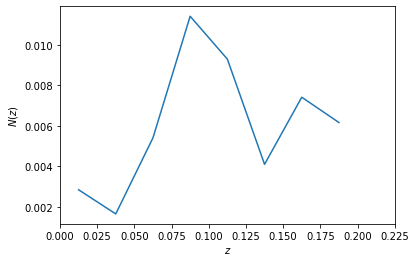

In [86]:
sample     = joined[(joined['MRH']> -22.) & (joined['MRH'] < -20.)]

dz         = 0.025
bins       = np.arange(0.0, 0.2+dz, dz)
cnts, _    = np.histogram(sample['Z'], bins=bins)

pl.plot(bins[:-1] + dz/2., cnts / dVs[:-1])
pl.xlim(0.0, 0.2+dz)

pl.xlabel('$z$')
pl.ylabel('$N(z)$')

# Done